# Projection plots for CERN HL YR

David Straub, 2018

In [1]:
import flavio
from wilson import Wilson
flavio.__version__

'1.0.1'

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
from projections import *

In [4]:
with open(PDAT, 'rb') as f:
    plotdata = pickle.load(f)

Hack to change number of sigma contours

In [5]:
def makesigma(pdat, levels):
    _pdat = pdat.copy()
    _pdat['levels'] = [-1] + [flavio.statistics.functions.delta_chi2(n, dof=2) for n in levels]
    return _pdat

Plot

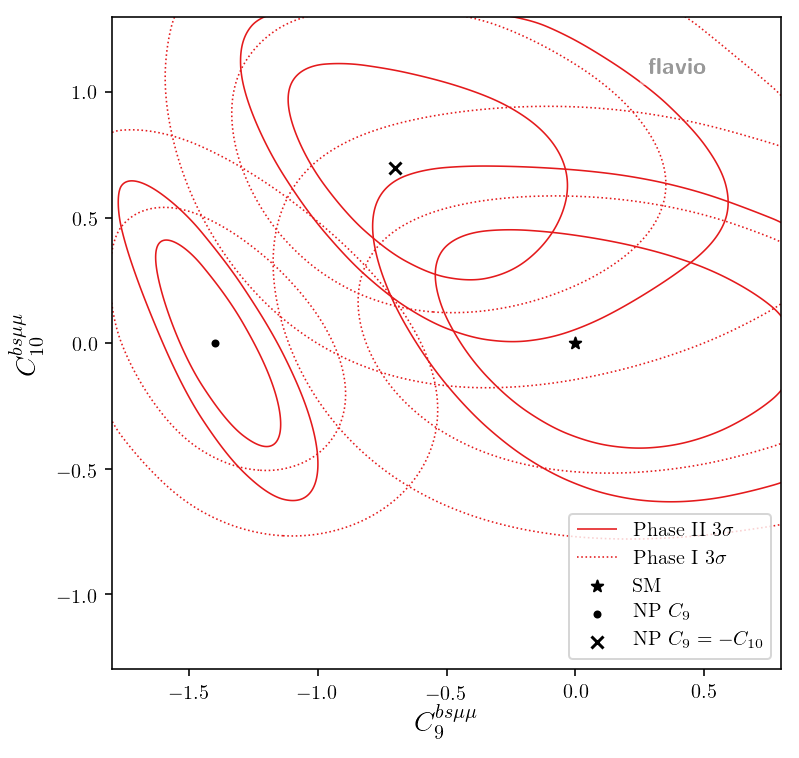

In [10]:
plt.figure(figsize=(6, 6))
opt = dict(filled=False, interpolation_factor=50)
opt_d = dict(filled=False, interpolation_factor=50, contour_args=dict(linestyles=':'))
for sc in ['SM', 'Scenario I', 'Scenario II']:
    fpl.contour(**makesigma(plotdata['Phase II stat+sys ' + sc], (3,)),
                label=r'Phase II $3\sigma$' if sc == 'SM' else None,
                col=0, **opt)
    fpl.contour(**makesigma(plotdata['Phase I stat+sys ' + sc], (3,)),
                label=r'Phase I $3\sigma$' if sc == 'SM' else None,
                col=0, **opt_d)
#     fpl.contour(**makesigma(plotdata['Phase II stat ' + sc], (2,)),
#                 label=r'Phase II stat $2\sigma$' if sc == 'SM' else None,
#                 col=1, **opt)
#     fpl.contour(**makesigma(plotdata['Phase I stat ' + sc], (2,)),
#                 label=r'Phase I stat $2\sigma$' if sc == 'SM' else None,
#                 col=1, **opt_d)
plt.xlabel(r'$C_9^{bs\mu\mu}$')
plt.ylabel(r'$C_{10}^{bs\mu\mu}$')
plt.scatter([0], [0], marker='*', label='SM', c='k')
plt.scatter([-1.4], [0], marker='.', label='NP $C_9$', c='k')
plt.scatter([-0.7], [0.7], marker='x', label=r'NP $C_9=-C_{10}$', c='k')
plt.xlim([-1.8, 0.8])
plt.ylim([-1.3, 1.3])
plt.legend(loc='lower right');
fpl.flavio_branding(version=False)
plt.savefig('YR_C9_C10.pdf', bbox_inches='tight')